In [361]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [362]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from exploration_utils import *

In [363]:
material_data = pd.read_csv("result_data/material_perf_2_10.csv")

social_data = pd.read_csv("result_data/social_perf_2_10.csv")

physical_data = pd.read_csv("result_data/physical_perf_2_10.csv")

with open("truism_data/physical_data_2.json", "r") as f:
    physical_params = json.load(f)

with open("truism_data/material_data_2.json", "r") as f:
    material_params = json.load(f)

with open("truism_data/social_data_2.json", "r") as f:
    social_params = json.load(f)

In [364]:
physical_data.head()

,truism_number,perturbation,premise,avg_binary_score,avg_ratio_score
0,0,original,original,1.0,0.890041
1,0,original,asymmetric_premise,0.0,-0.847403
2,0,original,asymmetric_conclusion,0.0,-0.881239
3,0,negation,original,0.0,-0.629667
4,0,negation,asymmetric_premise,1.0,0.791120


In [365]:
templates = get_templates([physical_params, material_params, social_params])

In [366]:
# templates = {}
templates

{'4': {}, '1': {}, '3': {}, '2': {}}

In [367]:
template_perturb_dict = get_perturbations(material_data, templates)
for key in template_perturb_dict:
    template_perturb_dict[key]["count"] = 0

In [369]:
template_perturb_dict["1"]

{'original-original': {'accuracy': 0, 'ratio_score': 0},
 'original-asymmetric_premise': {'accuracy': 0, 'ratio_score': 0},
 'original-asymmetric_conclusion': {'accuracy': 0, 'ratio_score': 0},
 'negation-original': {'accuracy': 0, 'ratio_score': 0},
 'negation-asymmetric_premise': {'accuracy': 0, 'ratio_score': 0},
 'negation-asymmetric_conclusion': {'accuracy': 0, 'ratio_score': 0},
 'antonym-original': {'accuracy': 0, 'ratio_score': 0},
 'antonym-asymmetric_premise': {'accuracy': 0, 'ratio_score': 0},
 'antonym-asymmetric_conclusion': {'accuracy': 0, 'ratio_score': 0},
 'paraphrase-original': {'accuracy': 0, 'ratio_score': 0},
 'paraphrase-asymmetric_premise': {'accuracy': 0, 'ratio_score': 0},
 'paraphrase-asymmetric_conclusion': {'accuracy': 0, 'ratio_score': 0},
 'paraphrase_inversion-original': {'accuracy': 0, 'ratio_score': 0},
 'paraphrase_inversion-asymmetric_premise': {'accuracy': 0, 'ratio_score': 0},
 'paraphrase_inversion-asymmetric_conclusion': {'accuracy': 0,
  'ratio_s

In [370]:
perturbation_order = get_perturbation_order(material_data, 24)

In [371]:
perturbation_order

['original-original',
 'original-asymmetric_premise',
 'original-asymmetric_conclusion',
 'negation-original',
 'negation-asymmetric_premise',
 'negation-asymmetric_conclusion',
 'antonym-original',
 'antonym-asymmetric_premise',
 'antonym-asymmetric_conclusion',
 'paraphrase-original',
 'paraphrase-asymmetric_premise',
 'paraphrase-asymmetric_conclusion',
 'paraphrase_inversion-original',
 'paraphrase_inversion-asymmetric_premise',
 'paraphrase_inversion-asymmetric_conclusion',
 'negation_antonym-original',
 'negation_antonym-asymmetric_premise',
 'negation_antonym-asymmetric_conclusion',
 'negation_paraphrase-original',
 'negation_paraphrase-asymmetric_premise',
 'negation_paraphrase-asymmetric_conclusion',
 'negation_paraphrase_inversion-original',
 'negation_paraphrase_inversion-asymmetric_premise',
 'negation_paraphrase_inversion-asymmetric_conclusion']

In [372]:
template_perturb_dict = fill_pertubation_data(material_data, material_params, template_perturb_dict)
template_perturb_dict = fill_pertubation_data(physical_data, physical_params, template_perturb_dict)
template_perturb_dict = fill_pertubation_data(social_data, social_params, template_perturb_dict)

In [373]:
template_accuracy = aggregate_templates(template_perturb_dict, "accuracy")
template_ratio = aggregate_templates(template_perturb_dict, "ratio_score")

In [374]:
template_accuracy

{'4': {'count': 324.0, 'pct': 0.5192307692307693, 'total': 624.0},
 '1': {'count': 240.0, 'pct': 0.5, 'total': 480.0},
 '3': {'count': 52.0, 'pct': 0.5416666666666666, 'total': 96.0},
 '2': {'count': 109.0, 'pct': 0.45416666666666666, 'total': 240.0}}

In [375]:
template_ratio

{'4': {'count': 9.351428341579172, 'pct': 0.01498626336791534, 'total': 624.0},
 '1': {'count': -1.2725220257984344,
  'pct': -0.0026510875537467385,
  'total': 480.0},
 '3': {'count': 7.12939298984931, 'pct': 0.07426451031093032, 'total': 96.0},
 '2': {'count': -16.516348728229595,
  'pct': -0.06881811970095665,
  'total': 240.0}}

In [376]:
def display_two_axis_bar_plot(x_labels, x_label, left_units, right_units, 
                              left_bar_data, right_bar_data, title, save=False):
    
    # https://matplotlib.org/gallery/api/two_scales.html
    
    # https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    fig, ax1 = plt.subplots()
    x = np.arange(len(x_labels))
    width = 0.35
    
    color = 'tab:red'
    ax1.set_ylabel(left_units, color=color)
    ax1.set_ylim(bottom=0)
    rects1 = ax1.bar(x - width/2, left_bar_data, width, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels, rotation=15)
#     ax1.set_xticklabels(x_labels)
    ax1.set_xlabel(x_label)
    
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel(right_units, color=color)
    ax2.set_ylim(bottom=-1, top=1)
    rects2 = ax2.bar(x + width/2, right_bar_data, width, color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    
#     ax1.legend(loc=2)
#     ax2.legend(loc=0)
    
    autolabel(rects1, ax1, "tab:red", False)
    autolabel(rects2, ax2, "tab:blue", True)
    
    ax1.set_title(title)
    random_guess = ax1.axhline(y=0.5,color="darkgray", linestyle=":") 
    ax1.legend((rects1, rects2, random_guess), (left_units, right_units, "Random Guess"),
               loc=1, ncol=1, fontsize=10, framealpha=0.8)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if save:
        plt.savefig("visual_data_two/{}_2.pdf".format(title), format='pdf', dpi=1200)
#         fig.savefig('myimage.svg', )
    
    plt.show()

In [377]:
def display_two_bar_plots(x_labels, x_label, y_label, y_one_label, y_two_label, data_one,
                          data_two, title, save=False):
    
    # https://matplotlib.org/gallery/api/two_scales.html
    
    # https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    fig, ax1 = plt.subplots()
    x = np.arange(len(x_labels))
    width = 0.35
    
    color_1 = 'tab:red'
    color_2 = 'tab:blue'
    ax1.set_ylabel(y_label, color=color_1)
#     ax1.set_ylim(bottom=-1, top=1)
    ax1.set_ylim(bottom=0, top=1)
    rects1 = ax1.bar(x - width/2, data_one, width, color=color_1)
    rects2 = ax1.bar(x + width/2, data_two, width, color=color_2)
    ax1.tick_params(axis='y', labelcolor=color_1)
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels, rotation=15)
    ax1.set_xlabel(x_label)
    

#     autolabel(rects1, ax1, color_1, False)
#     autolabel(rects2, ax1, color_2, False)
    random_guess = ax1.axhline(y=0.5, color='silver', linestyle=":")    
    ax1.set_title(title)
    ax1.legend((rects1, rects2, random_guess), (y_one_label, y_two_label, "Random Guess"),
               loc=1, ncol=1, fontsize=10, framealpha=0.8)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if save:
        plt.savefig("visual_data_two/{}_2.pdf".format(title), format='pdf', dpi=1200)
    
    plt.show()

In [459]:
def display_bar_plot(x_labels, x_label, y_label, data, title, color, bottom, top, save=False):
    
    # https://matplotlib.org/gallery/api/two_scales.html
    
    # https://matplotlib.org/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
    fig, ax1 = plt.subplots()
#     x = np.arange(len(x_labels))
    x = np.arange(1, 61, 1)
    width = 0.35
    
    ax1.set_ylabel(y_label, color=color)
    ax1.set_ylim(bottom=bottom, top=top)
#     ax1.set_ylim(bottom=0, top=1)
    rects1 = ax1.bar(x, data, width, label=y_label, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_xticks(np.arange(10, 61, 10))
#     ax1.set_xticks(x)
    ax1.set_xlim(1, 61)
#     ax1.set_xticklabels(x_labels, rotation=45)
#     ax1.set_xlabel(x_label)

#     autolabel(rects1, ax1, color, False)
    random_guess = ax1.axhline(y=(bottom+top)/2,color='silver', linestyle=":")    
    ax1.set_title(title, size=10)
    ax1.legend((rects1, random_guess), (y_label, "Random Guess"), loc=1, ncol=1, fontsize=10, framealpha=0.8)
    
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    if save:
        plt.savefig("visual_data_two/{}_2.pdf".format(title), format='pdf', dpi=1200)
    
    plt.show()

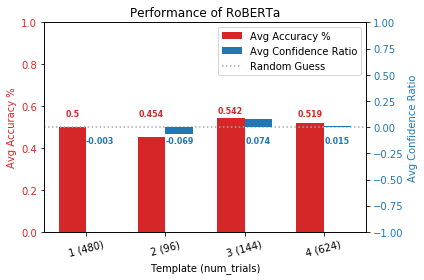

In [379]:
x_labels = ["1 (480)", "2 (96)", "3 (144)", "4 (624)"]
x_label = "Template (num_trials)"
left_units = "Avg Accuracy %"
right_units = "Avg Confidence Ratio"
left_bar_data = [round(template_accuracy[str(i)]["pct"], 3) for i in range(1, 5)]
right_bar_data = [round(template_ratio[str(i)]["pct"], 3) for i in range(1, 5)]
title = "Performance of RoBERTa"
display_two_axis_bar_plot(x_labels, x_label, left_units, right_units, 
                              left_bar_data, right_bar_data, title, False)

In [380]:
perturbation_accuracy = aggregate_pertubations(template_perturb_dict, "accuracy")
perturbation_ratio = aggregate_pertubations(template_perturb_dict, "ratio_score")

In [381]:
linguistic_operations = ["original-original", "negation-original", "antonym-original", "paraphrase-original", 
                         "paraphrase_inversion-original",
                         "negation_antonym-original", "negation_paraphrase-original", 
                         "negation_paraphrase_inversion-original"]

In [382]:
grouped_perturbation_accuracy = {}
for operator in linguistic_operations:
    count = 0
    total = 0
    for key in perturbation_accuracy:
        if key == operator:
            count += perturbation_accuracy[key]["count"]
            total += perturbation_accuracy[key]["total"]
    grouped_perturbation_accuracy[operator] = count / total

In [383]:
grouped_perturbation_accuracy

{'original-original': 0.5833333333333334,
 'negation-original': 0.5666666666666667,
 'antonym-original': 0.5,
 'paraphrase-original': 0.5833333333333334,
 'paraphrase_inversion-original': 0.5166666666666667,
 'negation_antonym-original': 0.5,
 'negation_paraphrase-original': 0.5,
 'negation_paraphrase_inversion-original': 0.45}

In [384]:
grouped_perturbation_ratio = {}
for operator in linguistic_operations:
    count = 0
    total = 0
    for key in perturbation_ratio:
        if key == operator:
            count += perturbation_ratio[key]["count"]
            total += perturbation_ratio[key]["total"]
    grouped_perturbation_ratio[operator] = count / total

In [385]:
grouped_perturbation_ratio

{'original-original': 0.17630020557898446,
 'negation-original': 0.10705144681718935,
 'antonym-original': -0.009981217441299754,
 'paraphrase-original': 0.17529844396803576,
 'paraphrase_inversion-original': 0.0791871782891634,
 'negation_antonym-original': 0.07518428893747862,
 'negation_paraphrase-original': 0.024051787554942958,
 'negation_paraphrase_inversion-original': -0.0611012514082511}

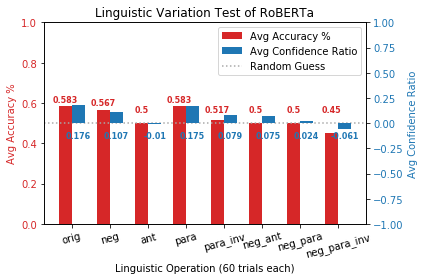

In [386]:
x_labels = ["orig", "neg", "ant", "para", "para_inv", "neg_ant", "neg_para", "neg_para_inv"]
x_label = "Linguistic Operation (60 trials each)"
left_units = "Avg Accuracy %"
left_bar_data = [round(grouped_perturbation_accuracy[key], 3) for key in linguistic_operations]
right_units = "Avg Confidence Ratio"
right_bar_data = [round(grouped_perturbation_ratio[key], 3) for key in linguistic_operations]
title = "Linguistic Variation Test of RoBERTa"
display_two_axis_bar_plot(x_labels, x_label, left_units, right_units, 
                              left_bar_data, right_bar_data, title, False)

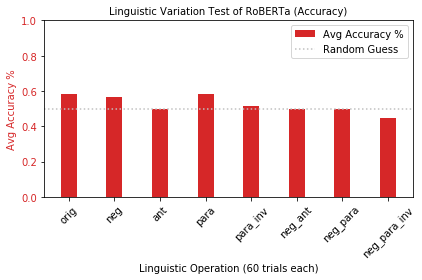

In [387]:
x_labels = ["orig", "neg", "ant", "para", "para_inv", "neg_ant", "neg_para", "neg_para_inv"]
x_label = "Linguistic Operation (60 trials each)"
left_units = "Avg Accuracy %"
left_bar_data = [round(grouped_perturbation_accuracy[key], 3) for key in linguistic_operations]
title = "Linguistic Variation Test of RoBERTa (Accuracy)"
display_bar_plot(x_labels, x_label, left_units, left_bar_data, title, False)

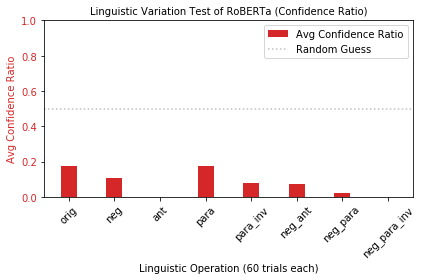

In [388]:
x_labels = ["orig", "neg", "ant", "para", "para_inv", "neg_ant", "neg_para", "neg_para_inv"]
x_label = "Linguistic Operation (60 trials each)"
# left_units = "Avg Accuracy %"
right_units = "Avg Confidence Ratio"
right_bar_data = [round(grouped_perturbation_ratio[key], 3) for key in linguistic_operations]
title = "Linguistic Variation Test of RoBERTa (Confidence Ratio)"
display_bar_plot(x_labels, x_label, right_units, right_bar_data, title, False)

In [389]:
logicial_operations = ["original", "asymmetric_premise", "asymmetric_conclusion"]

In [390]:
grouped_logical_accuracy = {}
for operator in logicial_operations:
    count = 0
    total = 0
    for key in perturbation_accuracy:
        if key != "count":
            if key.split("-")[1] == operator:
                count += perturbation_accuracy[key]["count"]
                total += perturbation_accuracy[key]["total"]
    grouped_logical_accuracy[operator] = count / total

In [391]:
grouped_logical_accuracy

{'original': 0.525,
 'asymmetric_premise': 0.49583333333333335,
 'asymmetric_conclusion': 0.4895833333333333}

In [392]:
grouped_logical_ratio = {}
for operator in logicial_operations:
    count = 0
    total = 0
    for key in perturbation_ratio:
        if key != "count":
            if key.split("-")[1] == operator:
                count += perturbation_ratio[key]["count"]
                total += perturbation_ratio[key]["total"]
    grouped_logical_ratio[operator] = count / total

In [393]:
grouped_logical_ratio

{'original': 0.07074886028703045,
 'asymmetric_premise': -0.03168086242935271,
 'asymmetric_conclusion': -0.04179310082142681}

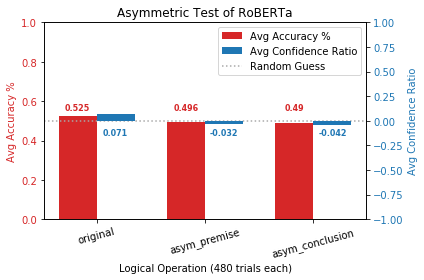

In [394]:
x_labels = ["original", "asym_premise", "asym_conclusion"]
x_label = "Logical Operation (480 trials each)"
left_units = "Avg Accuracy %"
right_units = "Avg Confidence Ratio"
left_bar_data = [round(grouped_logical_accuracy[key], 3) for key in grouped_logical_ratio]
right_bar_data = [round(grouped_logical_ratio[key], 3) for key in grouped_logical_ratio]
title = "Asymmetric Test of RoBERTa"
display_two_axis_bar_plot(x_labels, x_label, left_units, right_units, 
                              left_bar_data, right_bar_data, title, False)

In [395]:
more_vs_less = {"more" : {}, "less" : {}}

In [396]:
more_vs_less = get_perturbations(material_data, more_vs_less)
for key in more_vs_less:
    more_vs_less[key]["count"] = 0

In [399]:
more_vs_less = fill_pertubation_data_n(material_data, material_params, more_vs_less)
more_vs_less = fill_pertubation_data_n(physical_data, physical_params, more_vs_less)
more_vs_less = fill_pertubation_data_n(social_data, social_params, more_vs_less)

In [400]:
more_accuracy = aggregate_pertubations_m(more_vs_less["more"], "accuracy")
less_accuracy = aggregate_pertubations_m(more_vs_less["less"], "accuracy")

more_ratio = aggregate_pertubations_m(more_vs_less["more"], "ratio_score")
less_ratio = aggregate_pertubations_m(more_vs_less["less"], "ratio_score")

In [403]:
more_accuracy

{'original-original': {'count': 58.0, 'pct': 0.9666666666666667, 'total': 60},
 'original-asymmetric_premise': {'count': 2.0,
  'pct': 0.03333333333333333,
  'total': 60},
 'original-asymmetric_conclusion': {'count': 4.0,
  'pct': 0.06666666666666667,
  'total': 60},
 'negation-original': {'count': 10.0, 'pct': 0.16666666666666666, 'total': 60},
 'negation-asymmetric_premise': {'count': 56.0,
  'pct': 0.9333333333333333,
  'total': 60},
 'negation-asymmetric_conclusion': {'count': 56.0,
  'pct': 0.9333333333333333,
  'total': 60},
 'antonym-original': {'count': 4.0, 'pct': 0.06666666666666667, 'total': 60},
 'antonym-asymmetric_premise': {'count': 56.0,
  'pct': 0.9333333333333333,
  'total': 60},
 'antonym-asymmetric_conclusion': {'count': 58.0,
  'pct': 0.9666666666666667,
  'total': 60},
 'paraphrase-original': {'count': 52.0,
  'pct': 0.8666666666666667,
  'total': 60},
 'paraphrase-asymmetric_premise': {'count': 10.0,
  'pct': 0.16666666666666666,
  'total': 60},
 'paraphrase-asym

In [425]:
grouped_more_perturbation_accuracy_linguistic = {}
for operator in linguistic_operations:
    count = 0
    total = 0
    for key in more_accuracy:
        if key == operator:
            count += more_accuracy[key]["count"]
            total += more_accuracy[key]["total"]
    grouped_more_perturbation_accuracy_linguistic[operator] = count / total

grouped_more_perturbation_ratio_linguistic = {}
for operator in linguistic_operations:
    count = 0
    total = 0
    for key in more_ratio:
        if key == operator:
            count += more_ratio[key]["count"]
            total += more_ratio[key]["total"]
    grouped_more_perturbation_ratio_linguistic[operator] = count / total

grouped_more_perturbation_accuracy_logical = {}
for operator in logicial_operations:
    count = 0
    total = 0
    for key in more_accuracy:
        if key != "count":
            if key.split("-")[1] == operator:
                count += more_accuracy[key]["count"]
                total += more_accuracy[key]["total"]
    grouped_more_perturbation_accuracy_logical[operator] = count / total

grouped_more_perturbation_ratio_logical = {}
for operator in logicial_operations:
    count = 0
    total = 0
    for key in more_ratio:
        if key != "count":
            if key.split("-")[1] == operator:
                count += more_ratio[key]["count"]
                total += more_ratio[key]["total"]
    grouped_more_perturbation_ratio[operator] = count / total

# grouped_more_perturbation_ratio

In [426]:
grouped_less_perturbation_accuracy_linguistic = {}
for operator in linguistic_operations:
    count = 0
    total = 0
    for key in less_accuracy:
        if key == operator:
            count += less_accuracy[key]["count"]
            total += less_accuracy[key]["total"]
    grouped_less_perturbation_accuracy_linguistic[operator] = count / total

grouped_less_perturbation_ratio_linguistic = {}
for operator in linguistic_operations:
    count = 0
    total = 0
    for key in less_ratio:
        if key == operator:
            count += less_ratio[key]["count"]
            total += less_ratio[key]["total"]
    grouped_less_perturbation_ratio_linguistic[operator] = count / total

grouped_less_perturbation_accuracy_logical = {}
for operator in logicial_operations:
    count = 0
    total = 0
    for key in less_accuracy:
        if key != "count":
            if key.split("-")[1] == operator:
                count += less_accuracy[key]["count"]
                total += less_accuracy[key]["total"]
    grouped_less_perturbation_accuracy_logical[operator] = count / total

grouped_less_perturbation_ratio_logical = {}
for operator in logicial_operations:
    count = 0
    total = 0
    for key in less_ratio:
        if key != "count":
            if key.split("-")[1] == operator:
                count += less_ratio[key]["count"]
                total += less_ratio[key]["total"]
    grouped_less_perturbation_ratio[operator] = count / total

# grouped_more_perturbation_ratio

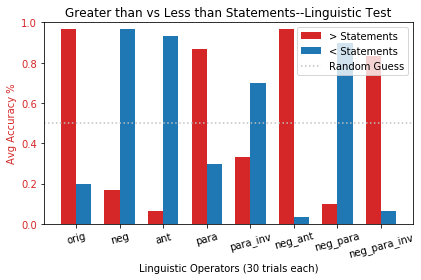

In [427]:
x_labels = ["orig", "neg", "ant", "para", "para_inv", "neg_ant", "neg_para", "neg_para_inv"]
x_label = "Linguistic Operators (30 trials each)"
y_label = "Avg Accuracy %"
y_one_label = "> Statements"
data_one = [round(grouped_more_perturbation_accuracy_linguistic[key], 3) for key in linguistic_operations]
y_two_label = "< Statements"
data_two = [round(grouped_less_perturbation_accuracy_linguistic[key], 3) for key in linguistic_operations]
title = "Greater than vs Less than Statements--Linguistic Test"
display_two_bar_plots(x_labels, x_label, y_label, y_one_label, y_two_label, data_one,
                      data_two, title, False)

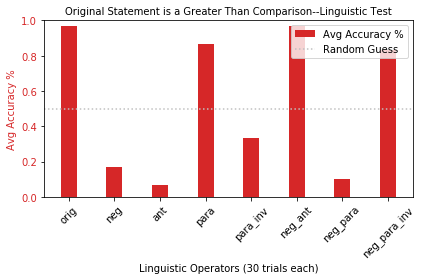

In [432]:
x_labels = ["orig", "neg", "ant", "para", "para_inv", "neg_ant", "neg_para", "neg_para_inv"]
x_label = "Linguistic Operators (30 trials each)"
y_label = "Avg Accuracy %"
title = "Original Statement is a Greater Than Comparison--Linguistic Test"
more_data = [round(grouped_more_perturbation_accuracy_linguistic[key], 3) for key in linguistic_operations]
display_bar_plot(x_labels, x_label, y_label, more_data, title, color="tab:red", bottom=0, top=1, save=True)



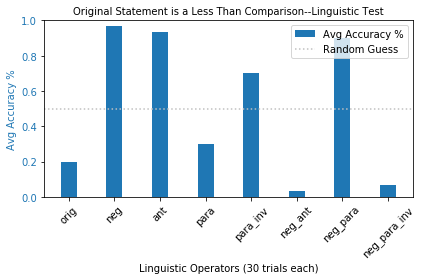

In [434]:
x_labels = ["orig", "neg", "ant", "para", "para_inv", "neg_ant", "neg_para", "neg_para_inv"]
x_label = "Linguistic Operators (30 trials each)"
y_label = "Avg Accuracy %"
title = "Original Statement is a Less Than Comparison--Linguistic Test"
more_data = [round(grouped_less_perturbation_accuracy[key], 3) for key in linguistic_operations]
display_bar_plot(x_labels, x_label, y_label, more_data, title, color="tab:blue", bottom=0, top=1, save=True)

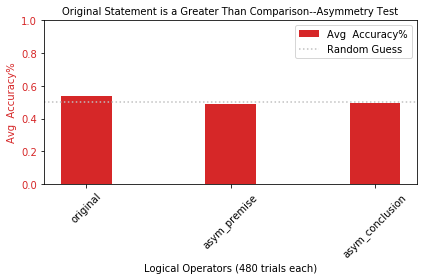

In [439]:
x_labels = ["original", "asym_premise", "asym_conclusion"]
x_label = "Logical Operators (480 trials each)"
y_label = "Avg  Accuracy%"
title = "Original Statement is a Greater Than Comparison--Asymmetry Test"
more_data = [round(grouped_more_perturbation_accuracy_logical[key], 3) for key in logicial_operations]
display_bar_plot(x_labels, x_label, y_label, more_data, title, color="tab:red", bottom=0, top=1, save=True)

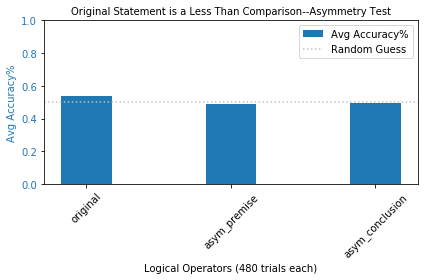

In [440]:
x_labels = ["original", "asym_premise", "asym_conclusion"]
x_label = "Logical Operators (480 trials each)"
y_label = "Avg Accuracy%"
title = "Original Statement is a Less Than Comparison--Asymmetry Test"
more_data = [round(grouped_more_perturbation_accuracy_logical[key], 3) for key in logicial_operations]
display_bar_plot(x_labels, x_label, y_label, more_data, title, color="tab:blue", bottom=0, top=1, save=True)

In [197]:
grouped_logical_more_accuracy = {}
for operator in logicial_operations:
    count = 0
    total = 0
    for key in more_accuracy:
        if key != "count":
            if key.split("-")[1] == operator:
                count += more_accuracy[key]["count"]
                total += more_accuracy[key]["total"]
    grouped_logical_more_accuracy[operator] = count / total

In [198]:
grouped_logical_less_accuracy = {}
for operator in logicial_operations:
    count = 0
    total = 0
    for key in less_accuracy:
        if key != "count":
            if key.split("-")[1] == operator:
                count += less_accuracy[key]["count"]
                total += less_accuracy[key]["total"]
    grouped_logical_less_accuracy[operator] = count / total

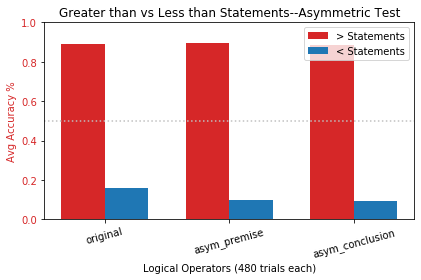

In [225]:
x_labels = ["original", "asym_premise", "asym_conclusion"]
x_label = "Logical Operators (480 trials each)"
y_label = "Avg Accuracy %"
y_one_label = "> Statements"
data_one = [round(grouped_logical_more_accuracy[key], 3) for key in logicial_operations]
y_two_label = "< Statements"
data_two = [round(grouped_logical_less_accuracy[key], 3) for key in logicial_operations]
title = "Greater than vs Less than Statements--Asymmetric Test"
display_two_bar_plots(x_labels, x_label, y_label, y_one_label, y_two_label, data_one,
                      data_two, title, True)

In [203]:
material_data.head()

,truism_number,perturbation,premise,avg_binary_score,avg_ratio_score
0,0,original,original,1.0,0.882697
1,0,original,asymmetric_premise,0.0,-0.695894
2,0,original,asymmetric_conclusion,0.0,-0.745709
3,0,negation,original,0.0,-0.931892
4,0,negation,asymmetric_premise,1.0,0.927463


In [204]:
finished_truisms = {}
curr_truism = 0
truisms_data = {}
for i, row in material_data.iterrows():
    truism_number = row["truism_number"]
    key = "material-{}".format(truism_number)
    if key not in finished_truisms:
        curr_truism += 1
        finished_truisms[key] = 1

    if curr_truism in truisms_data:
        truisms_data[curr_truism]["avg_binary_score"] += row["avg_binary_score"]
        truisms_data[curr_truism]["avg_ratio_score"] += row["avg_ratio_score"]
    else:
        truisms_data[curr_truism] = {}
        truisms_data[curr_truism]["avg_binary_score"] = row["avg_binary_score"]
        truisms_data[curr_truism]["avg_ratio_score"] = row["avg_ratio_score"]

for i, row in physical_data.iterrows():
    truism_number = row["truism_number"]
    key = "physical-{}".format(truism_number)
    if key not in finished_truisms:
        curr_truism += 1
        finished_truisms[key] = 1

    if curr_truism in truisms_data:
        truisms_data[curr_truism]["avg_binary_score"] += row["avg_binary_score"]
        truisms_data[curr_truism]["avg_ratio_score"] += row["avg_ratio_score"]
    else:
        truisms_data[curr_truism] = {}
        truisms_data[curr_truism]["avg_binary_score"] = row["avg_binary_score"]
        truisms_data[curr_truism]["avg_ratio_score"] = row["avg_ratio_score"]

for i, row in social_data.iterrows():
    truism_number = row["truism_number"]
    key = "social-{}".format(truism_number)
    if key not in finished_truisms:
        curr_truism += 1
        finished_truisms[key] = 1

    if curr_truism in truisms_data:
        truisms_data[curr_truism]["avg_binary_score"] += row["avg_binary_score"]
        truisms_data[curr_truism]["avg_ratio_score"] += row["avg_ratio_score"]
    else:
        truisms_data[curr_truism] = {}
        truisms_data[curr_truism]["avg_binary_score"] = row["avg_binary_score"]
        truisms_data[curr_truism]["avg_ratio_score"] = row["avg_ratio_score"]

for key in truisms_data:
    truisms_data[key]["avg_binary_score"] = truisms_data[key]["avg_binary_score"] / 24.0
    truisms_data[key]["avg_ratio_score"] = truisms_data[key]["avg_ratio_score"] / 24.0

In [205]:
# truisms_data

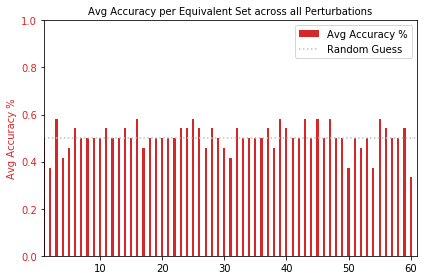

In [461]:
x_labels = list(truisms_data.keys())
x_label = "Equivalent Sets"
left_units = "Avg Accuracy %"
left_bar_data = [round(truisms_data[key]["avg_binary_score"], 3) for key in x_labels]
# left_bar_data
title = "Avg Accuracy per Equivalent Set across all Perturbations"
display_bar_plot([], x_label, left_units, left_bar_data, title, color="tab:red", bottom=0, top=1, save=True)

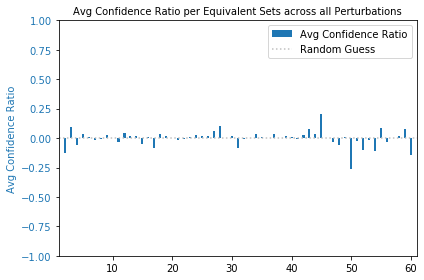

In [460]:
x_labels = list(truisms_data.keys())
x_label = "Equivalent Sets"
left_units = "Avg Confidence Ratio"
left_bar_data = [round(truisms_data[key]["avg_ratio_score"], 3) for key in x_labels]
# left_bar_data
title = "Avg Confidence Ratio per Equivalent Sets across all Perturbations"
display_bar_plot([], x_label, left_units, left_bar_data, title, color="tab:blue", bottom=-1, top=1, save=True)